# Python Filter Test
- Band Pass Filter Process
- Block Process
- Overlap add Process
- FIR Filter Process Test



In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import struct
import io
import os
import sys
import time
import math
import platform

# Import Audio
import wave
import pyaudio
import librosa

import numpy as np
import scipy
import scipy.signal as sig
import matplotlib.pyplot as plt
import soundfile

# User Libraries
import pyOssWavfile
import pyRoomAcoustic as room
import pyOssDebug as dbg
import pyOssFilter



In [2]:
# .wav File Open

#############################################################################
#  Impulse Data Load -------------------------------------------------------#
#############################################################################

impulse_dir = os.path.join(os.getcwd(), 'impulsefiles')     # Path of audiofiles folder

# IMPULSE WAVE FILE
#wav_fname_impulse = "TyndallBruceMonument"
#wav_fname_impulse = "ElvedenHallMarbleHall'"
#wav_fname_impulse = "EmptyApartmentBedroom"
#wav_fname_impulse = "FalklandPalaceRoyalTennisCourt"
#wav_fname_impulse = "InsidePiano"
wav_fname_impulse = "MaesHowe"
#wav_fname_impulse = "SportsCentreUniversityOfYork"
#wav_fname_impulse = "StairwayUniversityOfYork"
#wav_fname_impulse = "StAndrewsChurch"
#wav_fname_impulse = "mh3_000_ortf_48k"

impulse_fname = os.path.join(impulse_dir, wav_fname_impulse + '.wav')  #path + filename

impulse_fmt_chunk = pyOssWavfile.read_format(impulse_fname)
impulse_struct_fmt = pyOssWavfile.extractWavFmtChunk(impulse_fmt_chunk)

if impulse_struct_fmt.bitdepth == 24:        # Bitdepth가 24bit일 때는 pysoundfile을 이용하여 wav data를 불러옴
    impulse_data, impulse_struct_fmt.fs = soundfile.read(impulse_fname)
else:                                       # 그 외에는 scipy.io.wavfile을 수정한 함수 pyOssWavfile을 이용하여 wav data를 불러옴
    impulse_fmt_chunk, impulse_data, impulse_length = pyOssWavfile.read(impulse_fname)

# Type Conversion
if impulse_data.dtype == 'int16':
    impulse_data = np.float32(impulse_data/(2**15-1))
elif impulse_data.dtype == 'int32':
    impulse_data = np.float32(impulse_data/(2**31-1))

impulse_time = impulse_data.shape[0] / impulse_struct_fmt.fs

##############################################################################
#  AUDIO Data Load ----------------------------------------------------------#
##############################################################################

audio_dir = os.path.join(os.getcwd(), 'audiofiles')

# TEST AUDIO WAVE FILE
wav_fname_audio = "adult_female_speech"
#wav_fname_audio = "bagpipe_music"
#wav_fname_audio = "bagpipe_steady_chord"
#wav_fname_audio = "flute_arpeggio"
#wav_fname_audio = "flute_music"
#wav_fname_audio = "tuba_arpeggio"
#wav_fname_audio = "tuba_music"

audio_fname = os.path.join(audio_dir, wav_fname_audio + '.wav')  #path + filename + extention

audio_fmt_chunk = pyOssWavfile.read_format(audio_fname)
audio_struct_fmt = pyOssWavfile.extractWavFmtChunk(audio_fmt_chunk)

if audio_struct_fmt.bitdepth == 24:        # Bitdepth가 24bit일 때는 pysoundfile을 이용하여 wav data를 불러옴
    audio_data, audio_struct_fmt.fs = soundfile.read(audio_fname)
else:                                       # 그 외에는 scipy.io.wavfile을 수정한 함수 pyOssWavfile을 이용하여 wav data를 불러옴
    audio_fmt_chunk, audio_data, audio_length = pyOssWavfile.read(audio_fname)

# Type Conversion
if audio_data.dtype == 'int16':
    audio_data = np.float32(audio_data/(2**15-1))
elif audio_data.dtype == 'int32':
    audio_data = np.float32(audio_data/(2**31-1))

audio_time = audio_data.shape[0] / audio_struct_fmt.fs



0.032063492063492065


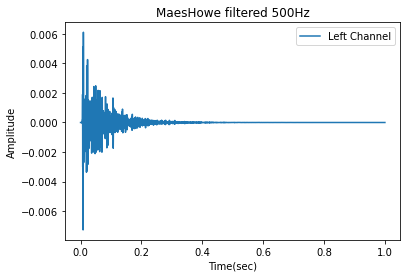

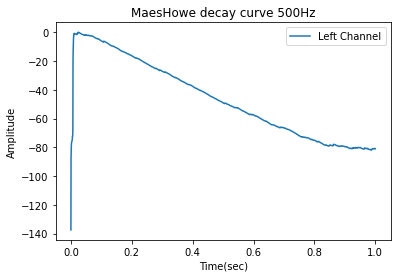

float64
500Hz impulse_T10= [[0.121]]


NameError: name 'impulse_T20' is not defined

In [5]:
array_fc = [250, 500, 1000, 2000, 4000, 8000, 16000]

# num = 0
# 
# for fc in array_fc:
#     band_f1, band_f2 = pyOssFilter.bp_cf_to_band_range(fc)
#     impulse_data_filtered = pyOssFilter.bandpass_filter(impulse_data[:,0], band_f1, band_f2, impulse_struct_fmt.fs, order=5)
#     impulse_decaycurve = room.decayCurve(impulse_data_filtered[:,0], impulse_time, impulse_struct_fmt.fs)
#     impulse_t60, impulse_t60nonLin = room.T60(impulse_decaycurve, impulse_struct_fmt.fs) 
#     dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_data_filtered, impulse_fname, "Left Channel", "Time(sec)", "Amplitude")
#     num = num + 1
# 
# for fc in array_fc:
#     band_f1, band_f2 = pyOssFilter.bp_cf_to_band_range(fc)
#     audio_data_filtered = pyOssFilter.bandpass_filter(audio_data[:,0], band_f1, band_f2, audio_struct_fmt.fs, order=5)
#     dbg.dPlotAudio(audio_struct_fmt.fs, audio_data_filtered, audio_fname, "Left Channel", "Time(sec)", "Amplitude")
#     num = num + 1

fc = 500

band_f1, band_f2 = pyOssFilter.bp_cf_to_band_range(fc)

# Band Pass Filter Butterworth 5th order
impulse_data_filtered = pyOssFilter.bandpass_filter(impulse_data[:,0], band_f1, band_f2, impulse_struct_fmt.fs, order=2)

# Band Pass Filter FIR Hamming
# firtab = 128
# if band_f2 > 20000:
#     band_f2 = 20000
# coef_fir1 = np.float32(sig.firwin(firtab, [band_f1, band_f2], pass_zero=False, fs=audio_struct_fmt.fs))
# impulse_data_filtered = sig.fftconvolve(impulse_data[:,0], coef_fir1)

dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_data_filtered, wav_fname_impulse + ' filtered ' + str(fc) + 'Hz', "Left Channel", "Time(sec)", "Amplitude")

impulse_decaycurve = room.decayCurve(impulse_data_filtered, impulse_time, impulse_struct_fmt.fs)
dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_decaycurve, wav_fname_impulse + ' decay curve ' + str(fc) + 'Hz', "Left Channel", "Time(sec)", "Amplitude")
print(impulse_decaycurve.dtype)

impulse_t60, impulse_t60nonLin = room.RT60(impulse_decaycurve, impulse_struct_fmt.fs) 
impulse_EDT, impulse_EDTnonLin = room.EDT(impulse_decaycurve, impulse_struct_fmt.fs)
impulse_t20, impulse_t20nonLin = room.T20(impulse_decaycurve, impulse_struct_fmt.fs)
impulse_t30, impulse_t30nonLin = room.T30(impulse_decaycurve, impulse_struct_fmt.fs)
mpulse_t60, impulse_t60nonLin = room.RT60(impulse_decaycurve, impulse_struct_fmt.fs) 
print(str(fc) +"Hz impulse_T10=", impulse_EDT/6)      # for Debug
print(str(fc) +"Hz impulse_T20=", impulse_t20, "impulse_RT60(use T20)=", impulse_t20 * 3 )          # for Debug
print(str(fc) +"Hz impulse_T30=", impulse_t30, "impulse_RT60(use T30)=", impulse_t30 * 2)          # for Debug
print(str(fc) +"Hz impulse_RT60=", impulse_t60)            # for Debug
print(str(fc) +"Hz impulse_EDT=", impulse_EDT)            # for Debug

impulse_C50 = room.C50(impulse_data_filtered, impulse_struct_fmt.fs)
impulse_C80 = room.C80(impulse_data_filtered, impulse_struct_fmt.fs)
impulse_D50 = room.D50(impulse_data_filtered, impulse_struct_fmt.fs)
print(str(fc) +"Hz impulse_C50=", impulse_C50)         # for Debug
print(str(fc) +"Hz impulse_C80=", impulse_C80)         # for Debug
print(str(fc) +"Hz impulse_D50=", impulse_D50)         # for Debug


5656 11312


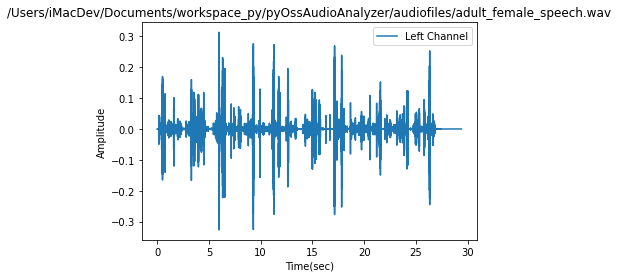

float32


In [4]:
# FIR Filter Test
array_fc = [250, 500, 1000, 2000, 4000, 8000, 16000]

# FIR Bandpass Fitler Design
firtab = 128

fc = 8000

oss_f1, oss_f2 = pyOssFilter.bp_cf_to_band_range(fc)

print(oss_f1, oss_f2)

coef_fir1 = np.float32(sig.firwin(firtab, [oss_f1, oss_f2], pass_zero=False, fs=audio_struct_fmt.fs))
#coef_fir2 = sig.firwin2(firtab)

# filtered = sig.lfilter(coef_fir1, [1.0], audio_data[:,0])
filtered = sig.fftconvolve(audio_data[:,0], coef_fir1)

dbg.dPlotAudio(audio_struct_fmt.fs, filtered, audio_fname, "Left Channel", "Time(sec)", "Amplitude")
print(filtered.dtype)

# filtered_f32 = np.float32(filtered)
# print(filtered_f32.dtype)

# If you want save result to wave file, do uncomment below line
#pyOssWavfile.write(os.path.join(audio_dir, wav_fname_audio + '_' + str(fc) +'Hz.filtered.wav'), int(audio_struct_fmt.fs), filtered)



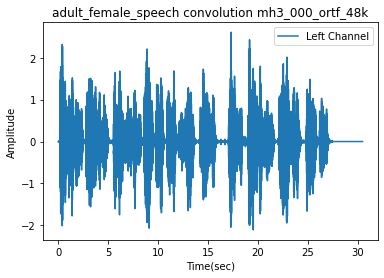

In [5]:
# FFT Convolution Function Test
# Test Audio data with Impulse data

#if audio_struct_fmt.fs != impulse_struct_fmt.fs:

ossConvol = sig.fftconvolve(audio_data[:,0], impulse_data[:,0])

dbg.dPlotAudio(audio_struct_fmt.fs, ossConvol, wav_fname_audio + ' convolution ' + wav_fname_impulse, "Left Channel", "Time(sec)", "Amplitude")

# If you want save  result to wave file, do uncomment below line
# pyOssWavfile.write(os.path.join(audio_dir, wav_fname_audio +'.with.' + wav_fname_impulse + '.conv.wav'), int(audio_struct_fmt.fs), ossConvol)




In [6]:
CHUNK = 1024
BUFFER = CHUNK * 4




